In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv('house-votes-84.csv',header=0)

In [2]:
df.head()

,party,handicapped_infants,water_project_cost_sharing,adop_of_budget_res,physican_fee_freeze,el_salvador_aid,religious_groups_in_schools,satillite,aid_to_nicaraguan_contras,missile,immigration,synfule_corp_cutback,education,superfund_right,crime,duty_free_export,export_admin_act_south_africa,Unnamed: 17
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,0


In [3]:
features = df.drop(columns='party')
target = df['party']

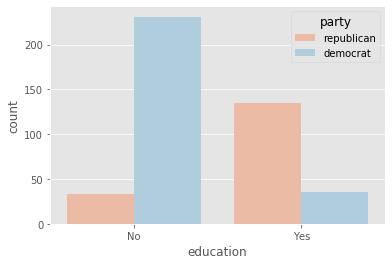

In [4]:
#count plot for education bill
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

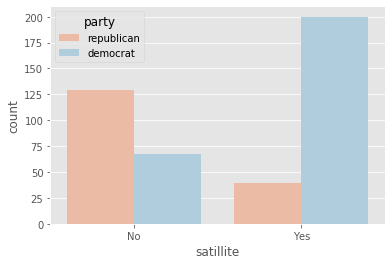

In [5]:
#count plot for satellite bill
plt.figure()
sns.countplot(x='satillite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

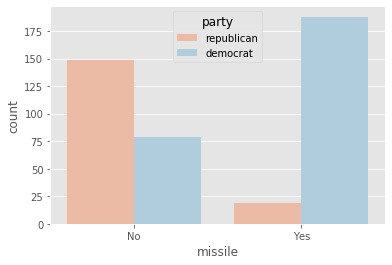

In [6]:
#count plot for missle bill
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [7]:
y = df['party'].values
X = df.drop('party', axis=1).values
print(X)

[[0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


In [10]:
#splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [12]:
#kNN instance

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

#label encoder
from sklearn import preprocessing    
def convert(data):
    for column in df.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])


# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [13]:
#Prediction

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_test)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_test)
print("Prediction: {}".format(new_prediction)) 


Prediction: ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'

In [14]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9541984732824428


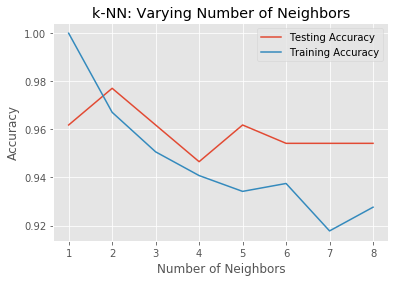

In [15]:
#Model Optimization

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# k = 2 is best